# Case study 2: The T signaling pathway

In [1]:
import networkx as nx
import pandas as pd

from eliater import version_df
from eliater.data import load_sachs_df
from eliater.discover_latent_nodes import (
    find_nuisance_variables,
    mark_nuisance_variables_as_latent,
    remove_nuisance_variables,
)
from eliater.examples import t_cell_signaling_example
from eliater.network_validation import print_graph_falsifications
from y0.algorithm.estimation import estimate_ace
from y0.algorithm.identify import Identification, identify_outcomes
from y0.dsl import P, Variable

version_df()

key                value
0  eliater   0.0.1-dev-261a89cc
1       y0       0.2.7-UNHASHED
2   Run at  2024-01-26 08:48:08

In [2]:
RAF = Variable("Raf")
ERK = Variable("Erk")
PKC = Variable("PKC")
MEK = Variable("Mek")

This is case study 2 in this paper: Eliater: an open source software for causal query estimation from observational measurements of biomolecular networks. The Figure below is the protein signalling network (G) of the cell signaling pathway presented in (Sachs et al., 2005). It models the molecular
mechanisms and regulatory processes involved in T cell activation, proliferation, and function.

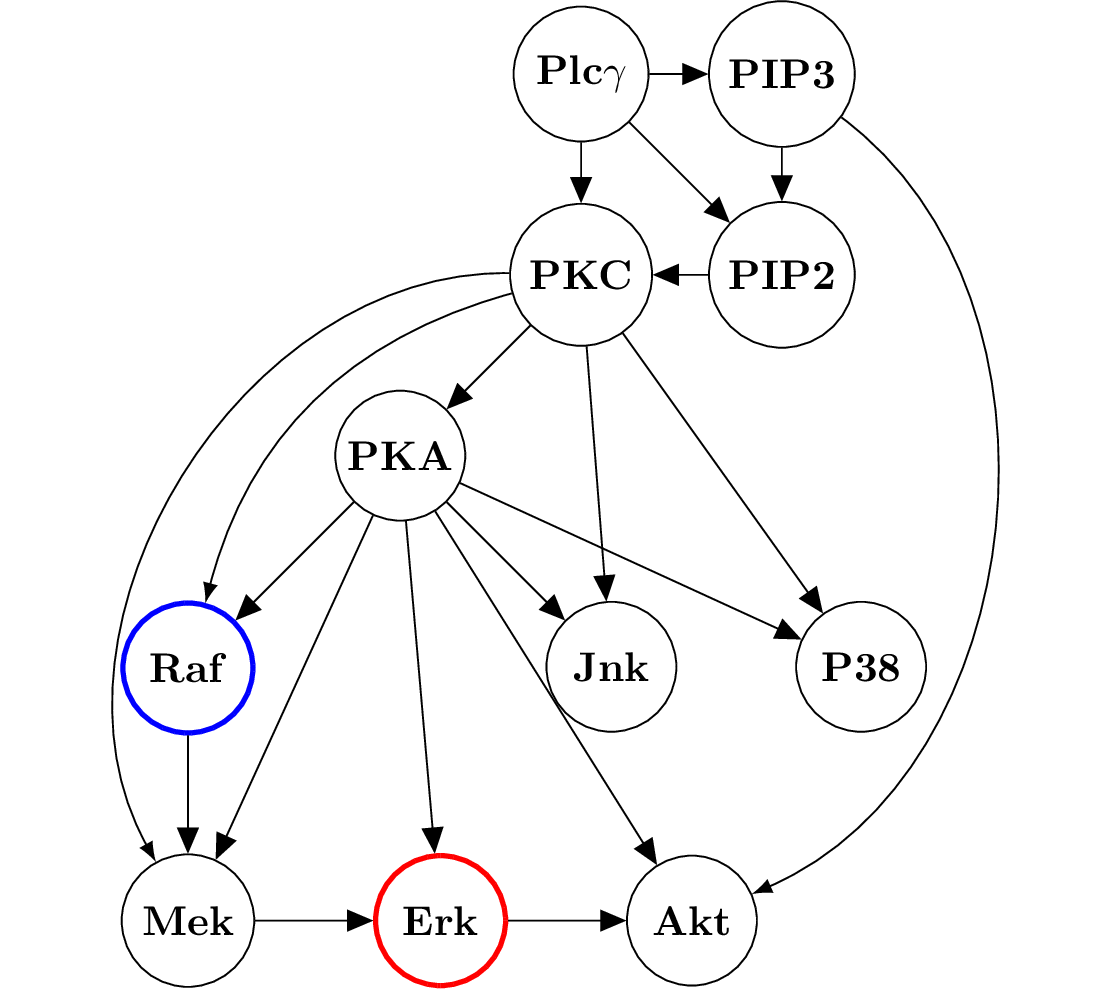

In [3]:
from IPython.display import Image

Image(filename="../img/Tsignaling.png", width=500, height=500)

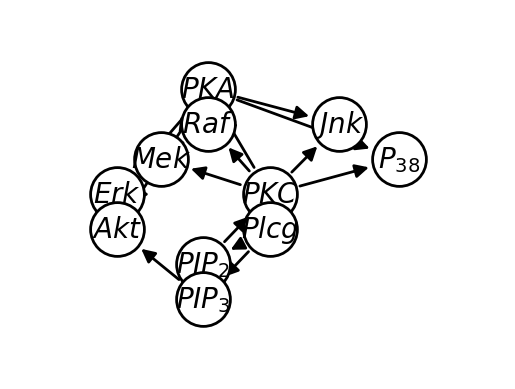

In [4]:
graph = t_cell_signaling_example.graph
graph.draw()

The observational data consisted of quantitative multivariate flow cytometry measurements of phosphorylated proteins derived from thousands of individual primary immune system cells. The cells were subjected to general stimuli meant to activate the desired paths. The distributions of measurements of individual proteins were skewed, and pairs of proteins exhibited nonlinear relationships. To account for that, the data were binned into
two levels corresponding to low, and high concentrations using Harteminkâ€™s approach (Hartemink, 2001) to preserve
the dependence structure of the original data.

In [5]:
data = load_sachs_df()
data.head()

Raf  Mek  Plcg  PIP2  PIP3  Erk  Akt  PKA  PKC  P38  Jnk
0    0    0     0     1     1    1    0    1    1    1    1
1    0    1     1     1     1    1    1    1    1    1    1
2    1    0     0     1     1    1    1    1    1    0    0
3    1    0     0     1     1    1    1    1    1    0    0
4    0    0     1     1     0    1    1    1    1    1    1

## Step 1: Verify correctness of the network structure

In [6]:
print_graph_falsifications(graph, data, method="chi-square", verbose=True, significance_level=0.01)

Of the 35 d-separations implied by the network's structure, only 6(17.14%) rejected the null hypothesis at p<0.01.

Since this is less than 30%, Eliater considers this minor and leaves the network unmodified.]

Finished in 1.70 seconds.



left right         given       stats         p  dof     p_adj  \
0   Plcg   Raf           PKC  249.869064  0.000000    2  0.000000   
1    Erk  PIP3           PKC  478.922745  0.000000    2  0.000000   
2    Mek  Plcg           PKC  208.486890  0.000000    2  0.000000   
3    Jnk   P38       PKA|PKC  171.716059  0.000000    4  0.000000   
4    Erk  PIP2           PKC   89.033425  0.000000    2  0.000000   
5    Akt   PKC  Erk|PIP3|PKA   38.175853  0.000003    7  0.000084   
6   PIP3   PKC     PIP2|Plcg   17.205217  0.001763    4  0.051135   
7    P38  Plcg           PKC    8.179063  0.016747    2  0.468918   
8   PIP2   Raf           PKC    1.972761  0.372924    2  1.000000   
9    Mek   P38       PKA|PKC    3.012076  0.555806    4  1.000000   
10   Akt   P38       PKA|PKC    2.354396  0.670884    4  1.000000   
11   Jnk   Raf       PKA|PKC    0.981685  0.912560    4  1.000000   
12   Erk   Raf       Mek|PKA    8.282501  0.081761    4  1.000000   
13   Akt   Jnk       PKA|PKC    8.209905  0.084185    4  1.000000   
14   Akt   Mek  Erk|PIP3|PKA    4.456759  0.725918    7  1.000000   
15   Akt  PIP2      PIP3|PKC    2.326599  0.675931    4  1.000000   
16   P38  PIP3           PKC    1.081993  0.582168    2  1.000000   
17  PIP2   PKA           PKC    0.795188  0.671935    2  1.000000   
18  PIP3   Raf           PKC    1.287893  0.525216    2  1.000000   
19   Mek  PIP3           PKC    1.933821  0.380256    2  1.000000   
20   Erk  Plcg           PKC    5.372049  0.068151    2  1.000000   
21   Mek  PIP2           PKC    0.732168  0.693444    2  1.000000   
22   P38   Raf       PKA|PKC    2.173855  0.703819    4  1.000000   
23   Jnk   Mek       PKA|PKC    0.317885  0.988631    4  1.000000   
24   P38  PIP2           PKC    0.564378  0.754131    2  1.000000   
25   Erk   PKC       Mek|PKA    4.004536  0.405392    4  1.000000   
26   Jnk  Plcg           PKC    1.378401  0.501977    2  1.000000   
27  PIP3   PKA           PKC    0.961809  0.618224    2  1.000000   
28   Erk   P38       Mek|PKA    7.116543  0.129856    4  1.000000   
29   Erk   Jnk       Mek|PKA    4.060855  0.397833    4  1.000000   
30   Jnk  PIP3           PKC    0.027516  0.986336    2  1.000000   
31   Jnk  PIP2           PKC    2.862771  0.238978    2  1.000000   
32   PKA  Plcg           PKC    0.344113  0.841932    2  1.000000   
33   Akt  Plcg      PIP3|PKC    0.692523  0.952248    4  1.000000   
34   Akt   Raf  Erk|PIP3|PKA    5.133173  0.643715    7  1.000000   

    p_adj_significant  
0                True  
1                True  
2                True  
3                True  
4                True  
5                True  
6               False  
7               False  
8               False  
9               False  
10              False  
11              False  
12              False  
13              False  
14              False  
15              False  
16              False  
17              False  
18              False  
19              False  
20              False  
21              False  
22              False  
23              False  
24              False  
25              False  
26              False  
27              False  
28              False  
29              False  
30              False  
31              False  
32              False  
33              False  
34              False

Out of 35 d-separations implied by the network, six failed. As the precentage of failed tests is below 30 percent, its effect on the estimation of causal query is minor. Hence, we proceed to the next step.

## Step 2: Check query identifiability

If the query is identifiable, the $Y_0$ package will return its estimand. Otherwise, nothing will be shown.

In [7]:
identify_outcomes(graph=graph, treatments=RAF, outcomes=ERK)

Sum[Mek, PIP2, PIP3, PKA, PKC, Plcg](P(Erk | Mek, PIP2, PIP3, PKA, PKC, Plcg, Raf) * P(Mek | PIP2, PIP3, PKA, PKC, Plcg, Raf) * P(PIP2 | PIP3, Plcg) * P(PIP3 | Plcg) * P(PKA | PIP2, PIP3, PKC, Plcg) * P(PKC | PIP2, PIP3, Plcg) * Sum[Erk, Mek, PIP2, PIP3, PKA, PKC, Raf](Sum[Akt, Jnk, P38](P(Akt, Erk, Jnk, Mek, P38, PIP2, PIP3, PKA, PKC, Plcg, Raf))))

In [8]:
identify_outcomes(graph=graph, treatments=PKC, outcomes=ERK)

Sum[Mek, PKA, Raf](P(Erk | Mek, PIP2, PIP3, PKA, PKC, Plcg, Raf) * P(Mek | PIP2, PIP3, PKA, PKC, Plcg, Raf) * P(PKA | PIP2, PIP3, PKC, Plcg) * P(Raf | PIP2, PIP3, PKA, PKC, Plcg))

The query is identifiable. Hence, we can proceed to the next step.

## Step 3: Find nuisance variables and mark them as latent

This function finds the nuisance variables for the input graph.

In [9]:
nuisance_variables = find_nuisance_variables(graph, treatments=RAF, outcomes=ERK)

print(f"The nuisance variables are {nuisance_variables}")

The nuisance variables are {Akt}


In [10]:
latent_variable_dag = mark_nuisance_variables_as_latent(
    graph,
    treatments=RAF,
    outcomes=ERK,
)

## Step 4: Simplify the network

In eliater, step 3, and 4 are both combined into a single function. Hence, the following function finds the nuisance variable (step 3), marks them as latent and then applies Evan's simplification rules (Step 4) to remove the nuisance variables. As a result, running the 'find_nuisance_variables' and 'mark_nuisance_variables_as_latent' functions is not necessary to get the value of step 4. However, we called them to illustrate the results. The new graph obtained in step 4 does not contain nuisance variables. 

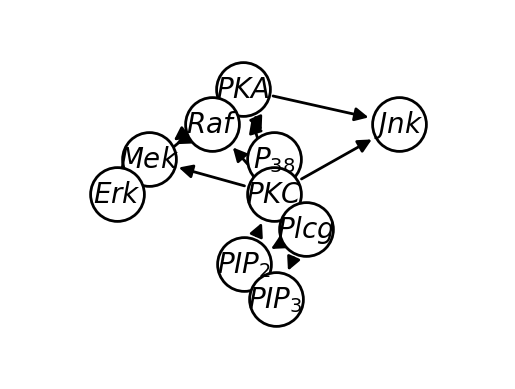

In [11]:
new_graph = remove_nuisance_variables(graph, treatments=RAF, outcomes=ERK)
new_graph.draw()

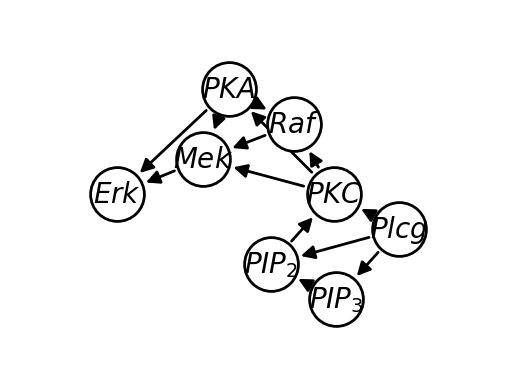

In [12]:
new_graph = remove_nuisance_variables(graph, treatments=PKC, outcomes=ERK)
new_graph.draw()

## Step 5: Estimate the query

In [13]:
estimate_ace(new_graph, treatments=RAF, outcomes=ERK, data=data)

-0.3058088128067109

In [14]:
estimate_ace(new_graph, treatments=PKC, outcomes=ERK, data=data)

0.4337988728954721

# Test the data that Karen gave me

TODO: what is the context for these? what are these datasets, where do they come from? Why are they here?

In [15]:
from eliater.data import load_sachs_continuous, load_sachs_test1, load_sachs_test2

data1 = load_sachs_test1()
data1.head()

praf   pmek   plcg   PIP2   PIP3  p44/42  pakts473    PKA     PKC     P38  \
0  176.0  294.0  337.0  644.0   9.73    18.4     101.0   5.99    93.1   505.0   
1  126.0  204.0  164.0  308.0   2.53    99.1     835.0  16.80  1358.0  6436.0   
2  433.0  710.0  233.0  422.0   8.66    23.9     150.0   3.11    91.4   487.0   
3  161.0  248.0  362.0  661.0   6.38    69.8     505.0   8.98  1358.0  6916.0   
4  151.0  257.0   93.1  172.0  14.30    47.0     392.0  26.40    69.8   422.0   

     pjnk  
0   142.0  
1  2110.0  
2   202.0  
3  4740.0  
4   418.0

In [16]:
data2 = load_sachs_test2()
data2.head()

praf  pmek   plcg   PIP2   PIP3  p44/42  pakts473    PKA    PKC   P38  pjnk
0  26.4  13.2   8.82  18.30  58.80    6.61      17.0  414.0  17.00  44.9  40.0
1  35.9  16.5  12.30  16.80   8.13   18.60      32.5  352.0   3.37  16.5  61.5
2  59.4  44.1  14.60  10.20  13.00   14.90      32.5  403.0  11.40  31.9  19.5
3  73.0  82.8  23.10  13.50   1.29    5.83      11.8  528.0  13.70  28.6  23.1
4  33.7  19.8   5.19   9.73  24.80   21.10      46.1  305.0   4.66  25.7  81.3

In [17]:
data_continuous = load_sachs_continuous()
data_continuous.head()

Raf   Mek   Plcg   PIP2   PIP3    Erk   Akt    PKA    PKC   P38   Jnk
1  26.4  13.2   8.82  18.30  58.80   6.61  17.0  414.0  17.00  44.9  40.0
2  35.9  16.5  12.30  16.80   8.13  18.60  32.5  352.0   3.37  16.5  61.5
3  59.4  44.1  14.60  10.20  13.00  14.90  32.5  403.0  11.40  31.9  19.5
4  73.0  82.8  23.10  13.50   1.29   5.83  11.8  528.0  13.70  28.6  23.1
5  33.7  19.8   5.19   9.73  24.80  21.10  46.1  305.0   4.66  25.7  81.3